In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Tuple, List, Union, Optional

# Wczytywanie zbioru punktów
df = pd.read_excel("zbior_punktow.xlsx", 'Arkusz2')
df

,U,x,y
0,N1,20,27
1,N2,10,14
2,N3,17,11
3,N4,40,38
4,N5,36,27
5,N6,32,23
6,N7,28,22
7,N8,11,16
8,N9,5,7
9,N10,45,35


In [42]:
# Przerobienie zbioru punktów z postaci pd.DataFrame to dict: key: 'NX', value: (x, y),  1 <= X <=30
dct = dict()
pkt_nazwa = list(df['U'])
pkt_x = list(df['x'])
pkt_y = list(df['y'])
for i in range(len(pkt_x)):
    dct[pkt_nazwa[i]] = (pkt_x[i], pkt_y[i])
print(dct)

{'N1': (20, 27), 'N2': (10, 14), 'N3': (17, 11), 'N4': (40, 38), 'N5': (36, 27), 'N6': (32, 23), 'N7': (28, 22), 'N8': (11, 16), 'N9': (5, 7), 'N10': (45, 35), 'N11': (15, 5), 'N12': (6, 14), 'N13': (10, 9), 'N14': (25, 14), 'N15': (47, 32), 'N16': (38, 22), 'N17': (20, 14), 'N18': (7, 11), 'N19': (42, 36), 'N20': (24, 20), 'N21': (31, 14), 'N22': (15, 24), 'N23': (16, 15), 'N24': (25, 28), 'N25': (32, 35), 'N26': (21, 20), 'N27': (30, 25), 'N28': (10, 5), 'N29': (3, 8), 'N30': (35, 33), 'N31': (6, 6)}


Sprawdzenie czy suma  0.9999999999999999


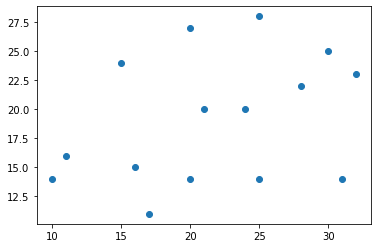

[(20, 27), (10, 14), (17, 11), (32, 23), (28, 22), (11, 16), (25, 14), (20, 14), (24, 20), (31, 14), (15, 24), (16, 15), (25, 28), (21, 20), (30, 25)]


In [43]:
df2 = pd.read_excel("zbior_punktow.xlsx", 'Arkusz3')
df2

# Wyodrędnienie odpowiednich punktów do poszczególnych klas A0, A1, A2, A3
# A0 - granice optymalności
# A1 - punkty docelowe
# A2 - punkty status - quo
# A3 - anty idealne - punkty odniesienia


A0_idx = df2.A0.to_list()
A1_idx = df2.A1.to_list()
A2_idx = df2.A2.to_list()
A3_idx = df2.A3.to_list()
# print('A3_idx', A3_idx)
# print(dct[A0_idx[1]])

A0 = []
A1 = []
A2 = []
A3 = []

for i in range(len(A0_idx)):
    A0.append(dct[A0_idx[i]])
    A1.append(dct[A1_idx[i]])
    A2.append(dct[A2_idx[i]])
    A3.append(dct[A3_idx[i]])

# Obliczanie pól dla każdej kombinacji puntów z zbioru A1, A2
# P = []
# for point in A1:
#     for j in range(len(A2)):
#         x_1, y_1 = point
#         x_2, y_2 = A2[j]
#         p1 = list(dct.keys())[list(dct.values()).index((x_1, y_1))]
#         p2 = list(dct.keys())[list(dct.values()).index((x_2, y_2))]
#         P.append((abs(x_1 - x_2)*abs(y_1 - y_2), p1, p2))
# print("P", P)

def check(u: Tuple, point_A_1: Tuple, point_A_2: Tuple) -> bool:
    """
    Sprawdzanie czy dana dany punkt znajduje się w prostokącie stworzonym przez punktu ze
    zbioru A1 i A2

    params: -u: Tuple(int, int)
            -A1_point: Tuple(int, int),
            -A2_point: Tuple(int, int),
            
    Return: bool
    """

    x_min, y_min = point_A_1
    x_max, y_max = point_A_2
    x, y = u
    if ((x >= x_min) and (x <= x_max)) and ((y >= y_min) and (y <= y_max)):
        return True
    else: 
        return False

def oblicz_pole(A1_point: Tuple, A2_point: Tuple, u: Tuple) -> Tuple:
    """
    Funkcja obliczająca pole pomiędzy A1_point, A2_point i sprawdza czy punkt ze zbioru status-quo znajduje się w
    obrębie tego prostokąta.


    params: -A1_point: Tuple(int, int),
            -A2_point: Tuple(int, int),
            -u: Tuple(int, int)

    Return: Tuple(Optional[Union[float, int], str, str])
    """

    x_1, y_1 = A1_point
    x_2, y_2 = A2_point
    p1 = list(dct.keys())[list(dct.values()).index((x_1, y_1))]
    p2 = list(dct.keys())[list(dct.values()).index((x_2, y_2))]
    if check(u,A1_point,A2_point):
        return (abs(x_1 - x_2)*abs(y_1 - y_2), p1, p2)
    else:
        return (0, p1, p2)

def wagi(A1: Tuple ,A2: Tuple,u: Tuple) -> List:
    """
    Funkcja obliczająca wagi na podstawie punktów A1, A2, u
    Wewnętrznie sprawdzany jest warunek czy dany punkt u znajduje się w prostokącie A1, A2

    params: -A1: List[Tuple(int, int)],
            -A2: List[Tuple(int, int)],
            -u: Tuple(int, int)

    Return: List[Tuple(float, str, str)]
    """
    suma = 0
    pola = []
    wagi_ = []
    
    for A1_point in A1:
        for A2_point in A2:
            x_1, y_1 = A1_point
            x_2, y_2 = A2_point
            p1 = list(dct.keys())[list(dct.values()).index((x_1, y_1))]
            p2 = list(dct.keys())[list(dct.values()).index((x_2, y_2))]
            pole = oblicz_pole(A1_point,A2_point,u)[0]
            suma += pole
            pola.append((pole,p1,p2))

    for pole_ in pola:
        pole,p1,p2 = pole_
        if suma != 0:
            waga = pole/suma
        else: 
            waga = 0
        wagi_.append((waga,p1,p2))

    return wagi_
        

def check_if_weight_sum_to_1(A1, A2, u):
    """
    Funkcja sprawdzająca czy obliczone wagi z danego punktu u sumują się do 1
    """
    x = wagi(A1,A2,u)
    suma = 0
    for i in x:
        suma += i[0]
    return suma

suma = check_if_weight_sum_to_1(A1, A2, dct['N1'])
print("Sprawdzenie czy suma ", suma)

# Zbiór punktów status-quo
B0 = []

A1xmin = min([point[0] for point in A1])
A2xmax = max([point[0] for point in A2])

# print('A1xmin ', A1xmin)
# print('A1xmax ', A2xmax)

for point_name in dct.keys():
    if A1xmin < dct[point_name][0] < A2xmax:
        if (dct[point_name] not in A1) and (dct[point_name] not in A2) and (dct[point_name] not in A0) and (dct[point_name] not in A3):
            B0.append(dct[point_name])
        
# print(B0)
plt.figure()
plt.scatter([point[0] for point in B0], [point[1] for point in B0])
plt.show()
print(B0)

In [44]:


# print(check(dct['N21'],dct['N11'],dct['N16']))
def distance(u: Tuple, A: Tuple) -> float:
    """
    Funkcja obliczająca dystans z punktu u do A
    params: u - Tuple(int, int)
            A - Tuple(int, int)

    return: float
    """
    x_A, y_A = A
    x, y = u
    d = np.sqrt((x-x_A)**2+(y-y_A)**2)
    return d

def skoring(u: Tuple, A1: List[Tuple], A2: List[Tuple]) -> Tuple:
    """
    Funkcja wyliczajaca wartość funkcji skoringowej dla danego 
    punktu u ze zbioru status quo

    params:
    u - Tuple(int, int)
    A1 - List[Tuple(int, int)]
    A2 - List[Tuple(int, int)]

    """
    wagi_ = wagi(A1,A2,u)
    F = 0
    for waga, A1_point, A2_point in wagi_:
            d_idealny = distance(u,dct[A1_point])
            d_anty = distance(u,dct[A2_point])
            f = d_anty/(d_anty + d_idealny)
            F += waga * f
    x,y = u
    u_ = list(dct.keys())[list(dct.values()).index((x, y))]
    return (F,u_)


# Poniższa częśc kodu odpowiada za tworzenie rankingu
# ranking jest zwracany w postaci List[Tuple(float, str')]
# listy punktów od najlepszego do najgorszego

ranking = []

for point in B0:
    ranking.append(skoring(point,A1,A2))
    
ranking = sorted(ranking, key = lambda tup: tup[0], reverse=True)

ranking_to_plot = [f'{i+1}: {ranking[i]}' for i in range(len(ranking))]
# print(ranking_to_plot)
print("Ranking:\n")
for elem in ranking_to_plot:
    print(elem)

Ranking:

1: (0.872009647750395, 'N2')
2: (0.8175453206812621, 'N8')
3: (0.7724528316196977, 'N3')
4: (0.7210594696641758, 'N23')
5: (0.6499078205493714, 'N17')
6: (0.5723620412317619, 'N22')
7: (0.540082620356766, 'N14')
8: (0.5272976015490336, 'N26')
9: (0.4613838641660679, 'N20')
10: (0.429849908005132, 'N21')
11: (0.42810143189080707, 'N1')
12: (0.34129465521924957, 'N7')
13: (0.3016601097574758, 'N24')
14: (0.26281155907358733, 'N6')
15: (0.2519370440578506, 'N27')
